# **Import of the Data files and the different modules**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [2]:
bank = pd.read_csv('Data/bank.csv', sep=';')
bank_full = pd.read_csv('Data/bank-full.csv', sep=';')

bank_add = pd.read_csv('Data/bank-additional.csv', sep=';')
bank_add_full = pd.read_csv('Data/bank-additional-full.csv', sep=';')

# **Get insights of the data**

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# The biggest Dataset is the Bank_full but the one with the most variables X is Bank_add_full. In order to get the best performing prediction model we decided to choose Bank_add_full as our base dataset for this study

# **Creating Binary Value**

In [8]:
bank_add_full.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#Input variables:
# bank client data:
#1 - age (numeric)
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
#8 - contact: contact communication type (categorical: 'cellular','telephone')
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## social and economic context attributes
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric)
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)
#
#Output variable (desired target):
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Output variable (success)

In [10]:
data_clean = bank_add_full
data_clean['y2'] = np.where(bank_add_full['y']=='yes','1','0')
# data_clean.tail(20)

### Job Data

In [11]:
# create a list of our conditions
# job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  --> unknown = 0
conditions_job = [
    (bank_add_full['job'] == 'admin.'),           #1
    (bank_add_full['job'] == 'blue-collar'),      #2
    (bank_add_full['job'] == 'entrepreneur'),     #3
    (bank_add_full['job'] == 'housemaid'),        #4
    (bank_add_full['job'] == 'management'),       #5
    (bank_add_full['job'] == 'retired'),          #6
    (bank_add_full['job'] == 'self-employed'),    #7
    (bank_add_full['job'] == 'services'),         #8
    (bank_add_full['job'] == 'student'),          #9
    (bank_add_full['job'] == 'technician'),       #10
    (bank_add_full['job'] == 'unemployed'),       #11
    ]

# create a list of the values we want to assign for each condition
values_job = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['job2'] = np.select(conditions_job, values_job)

# display updated DataFrame
# data_clean.head(20)

### Marital

In [12]:
# create a list of our conditions
# marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  ---> unknown = 0
conditions_marital = [
    (bank_add_full['marital'] == 'divorced'),           #1
    (bank_add_full['marital'] == 'married'),            #2
    (bank_add_full['marital'] == 'single'),             #3

    ]

# create a list of the values we want to assign for each condition
values_marital = ['1', '2', '3']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['marital2'] = np.select(conditions_marital, values_marital)

# display updated DataFrame
# data_clean.head(20)

### Education

In [13]:
# create a list of our conditions
# education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  --> unknown = 0
conditions_education = [
    (bank_add_full['education'] == 'basic.4y'),             #1
    (bank_add_full['education'] == 'basic.6y'),             #2
    (bank_add_full['education'] == 'basic.9y'),             #3
    (bank_add_full['education'] == 'high.school'),          #4
    (bank_add_full['education'] == 'illiterate'),           #5
    (bank_add_full['education'] == 'professional.course'),  #6
    (bank_add_full['education'] == 'self-employed'),        #7
    (bank_add_full['education'] == 'university.degree'),    #8
    ]

# create a list of the values we want to assign for each condition
values_education = ['1', '2', '3', '4', '5', '6', '7', '8']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['education2'] = np.select(conditions_education, values_education)

# display updated DataFrame
# data_clean.head(20)

### Default / Housing / Loan

In [14]:
# create a list of our conditions
# default: has credit in default? (categorical: 'no','yes','unknown')   -->  no = 0
conditions_default = [
    (bank_add_full['default'] == 'yes'),           #1
    (bank_add_full['default'] == 'unknown'),       #2
    ]

# housing: has housing loan? (categorical: 'no','yes','unknown')   -->  no = 0
conditions_housing = [
    (bank_add_full['housing'] == 'yes'),           #1
    (bank_add_full['housing'] == 'unknown'),       #2
    ]

# loan: has personal loan? (categorical: 'no','yes','unknown')   -->  no = 0
conditions_loan = [
    (bank_add_full['loan'] == 'yes'),              #1
    (bank_add_full['loan'] == 'unknown'),          #2
    ]

# create a list of the values we want to assign for each condition
values = ['1', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['default2'] = np.select(conditions_default, values)
data_clean['housing2'] = np.select(conditions_housing, values)
data_clean['loan2'] = np.select(conditions_loan, values)


# display updated DataFrame
# data_clean.head(20)

### Contact

In [15]:
#contact: contact communication type (categorical: 'cellular','telephone') --> telephone = 0
data_clean['contact2'] = np.where(bank_add_full['contact']=='cellular','1','0')
# data_clean.head(20)

### Month

In [16]:
print(bank_add_full['month'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


In [17]:
# create a list of our conditions
# month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  --> dec = 0
conditions_month = [
    (bank_add_full['month'] == 'jan'),       #1
    (bank_add_full['month'] == 'feb'),       #2
    (bank_add_full['month'] == 'mar'),       #3
    (bank_add_full['month'] == 'apr'),       #4
    (bank_add_full['month'] == 'may'),       #5
    (bank_add_full['month'] == 'jun'),       #6
    (bank_add_full['month'] == 'jul'),       #7
    (bank_add_full['month'] == 'aug'),       #8
    (bank_add_full['month'] == 'sep'),       #9
    (bank_add_full['month'] == 'oct'),       #10
    (bank_add_full['month'] == 'nov'),       #11
    ]

# create a list of the values we want to assign for each condition
values_month = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['month2'] = np.select(conditions_month, values_month)

# display updated DataFrame
# data_clean.head(20)


### Day

In [18]:
# create a list of our conditions
# day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') --> fri = 0
conditions_day = [
    (bank_add_full['day_of_week'] == 'mon'),       #1
    (bank_add_full['day_of_week'] == 'tue'),       #2
    (bank_add_full['day_of_week'] == 'wed'),       #3
    (bank_add_full['day_of_week'] == 'thu'),       #4
    ]

# create a list of the values we want to assign for each condition
values_day = ['1', '2', '3', '4']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['day_of_week2'] = np.select(conditions_day, values_day)

# display updated DataFrame
# data_clean.head(20)


### poutcome

In [19]:
# create a list of our conditions
# poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') --> failure = 0
conditions_poutcome = [
    (bank_add_full['poutcome'] == 'success'),       #1
    (bank_add_full['poutcome'] == 'nonexistent')    #2
    ]

# create a list of the values we want to assign for each condition
values_poutcome = ['1', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
data_clean['poutcome2'] = np.select(conditions_poutcome, values_poutcome)

# display updated DataFrame
# data_clean.head(20)

### Drop all of the non numeric / binary values

In [20]:
data_clean.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1, inplace=True)
data_clean.head(20)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job2,marital2,education2,default2,housing2,loan2,contact2,month2,day_of_week2,poutcome2
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,4,2,1,0,0,0,0,5,1,2
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,4,2,0,0,0,5,1,2
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,4,0,1,0,0,5,1,2
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,2,2,0,0,0,0,5,1,2
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,4,0,0,1,0,5,1,2
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,3,2,0,0,0,5,1,2
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,2,6,0,0,0,0,5,1,2
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,2,2,0,2,0,0,0,5,1,2
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,10,3,6,0,1,0,0,5,1,2
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,3,4,0,1,0,0,5,1,2


# **Split the data 50/20/30 into training, validation, and test sample**

In [21]:
# https://www.youtube.com/watch?v=ZHPwPHkrT4I
# https://www.youtube.com/watch?v=k9cuKNnLF9w


# Train = estimate the model
# Validation = find the optimal lambda
# Test = compare the model with other models

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_main, test = train_test_split(data_clean, test_size=0.3, random_state=42)                    #random_state means that it will always start at the same point therefore the results are always the same
print("Länge vom Main: ", len(train_main))
print("Prozent von Total: " '{:.2f}'.format(len(train_main)/len(data_clean)*100), "%")
print("Länge vom Test: ", len(test))
print("Prozent von Total: " '{:.2f}'.format(len(test)/len(data_clean)*100), "%")

Länge vom Main:  28831
Prozent von Total: 70.00 %
Länge vom Test:  12357
Prozent von Total: 30.00 %


In [24]:
train, valuation = train_test_split(train_main, test_size=(0.2/0.7), random_state=42)                  #random_state means that it will always start at the same point therefore the results are always the same
print("Länge vom Train: ", len(train))
print("Prozent von Total: " '{:.2f}'.format(len(train)/len(data_clean)*100), "%")
print("Länge vom Valuation: ", len(valuation))
print("Prozent von Total: " '{:.2f}'.format(len(valuation)/len(data_clean)*100), "%")

Länge vom Train:  20593
Prozent von Total: 50.00 %
Länge vom Valuation:  8238
Prozent von Total: 20.00 %


In [25]:
print("Länge vom Datenset: ", len(data_clean))
print("Total assigned:     ", len(train) + len(test) + len(valuation))

Länge vom Datenset:  41188
Total assigned:      41188


In [26]:
data_clean.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job2,marital2,education2,default2,housing2,loan2,contact2,month2,day_of_week2,poutcome2
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,4,2,1,0,0,0,0,5,1,2
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,4,2,0,0,0,5,1,2
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,4,0,1,0,0,5,1,2
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,2,2,0,0,0,0,5,1,2
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,8,2,4,0,0,1,0,5,1,2


In [28]:
train.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job2,marital2,education2,default2,housing2,loan2,contact2,month2,day_of_week2,poutcome2
38470,29,633,2,999,0,-3.4,92.431,-26.9,0.731,5017.5,...,10,3,6,0,1,0,1,10,1,2
2899,33,174,2,999,0,1.1,93.994,-36.4,4.859,5191.0,...,1,2,8,0,1,0,0,5,3,2
32265,38,1276,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,5,2,8,0,1,0,1,5,0,2
17993,26,142,8,999,0,1.4,93.918,-42.7,4.963,5228.1,...,8,3,8,0,1,0,1,7,3,2
30573,22,1370,3,999,0,-1.8,92.893,-46.2,1.354,5099.1,...,9,3,4,0,1,1,1,5,1,2


In [ ]:
# as you can see on the train set - the index numbers are in no order therefore randomly chosen. Our Dataset is no ready for our prediction model

## Feature Selection

In [11]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Ridge

In [1]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 5; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0

#Regressors
np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)
print("Check correlation:", np.corrcoef(x2,x3)[0,1])

#Error term
epsilon = np.random.normal(0,1,n)

#Centering the regressors necessary for ridge regression 
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x3 = x3 - np.mean(x3)

#Data Generating Process (True Model)
y = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon

#Correctly specified
x=np.column_stack((x1,x2,x3))
xcon = sm.add_constant(x)        
model = sm.OLS(y,xcon) 
results = model.fit()
print(results.summary2())

xs = np.column_stack((np.ones(n),x1,x2,x3))
betaOLS = np.dot(np.linalg.inv(np.dot(xs.T,xs)),np.dot(xs.T,y))
print("OLS Estimates               : ", betaOLS)

lam = 50
xs = np.column_stack((x1,x2,x3))
betaRidge = np.dot(np.linalg.inv(np.dot(xs.T,xs)+lam*np.identity(np.shape(xs)[1])),np.dot(xs.T,y))
print("Own Ridge Estimates         : ", np.append(np.mean(y),betaRidge))

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
lr = LinearRegression()
lr.fit(xs,y)
rr = Ridge(alpha=lam, fit_intercept=True, solver='sparse_cg')
# rr = Ridge(alpha=lam, fit_intercept=True, solver='sparse_cg', tol=0.00000001)
rr.fit(xs, y)
print("Ridge Estimates from package: ",np.append(rr.intercept_,rr.coef_))

Check correlation: 0.00656204011451738
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.974     
Dependent Variable: y                AIC:                28556.6874
Date:               2022-05-17 11:46 BIC:                28585.5288
No. Observations:   10000            Log-Likelihood:     -14274.   
Df Model:           3                F-statistic:        1.230e+05 
Df Residuals:       9996             Prob (F-statistic): 0.00      
R-squared:          0.974            Scale:              1.0175    
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const     4.9980      0.0101    495.4721    0.0000    4.9782    5.0178
x1        3.0015      0.0102    293.8430    0.0000    2.9815    3.0216
x2        5.0176      0.0102    493.9339    0.0000    4.9977    5.0375
x3       

# Lasso

In [4]:
from sklearn.linear_model import Lasso
lam = 2.3

lr = LinearRegression()
lr.fit(xs,y)
rr = Lasso(alpha=lam, fit_intercept=True)
rr.fit(xs,y)
print("Lasso Estimates from package:", np.append(rr.intercept_,rr.coef_))

Lasso Estimates from package: [4.99799408 0.62934538 2.6802179  0.        ]


# Logit Marginal Effects

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.585    
Dependent Variable: y                AIC:                5729.3824
Date:               2022-05-26 09:08 BIC:                5758.2238
No. Observations:   10000            Log-Likelihood:     -2860.7  
Df Model:           3                F-statistic:        4697.    
Df Residuals:       9996             Prob (F-statistic): 0.00     
R-squared:          0.585            Scale:              0.10379  
---------------------------------------------------------------------
         Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const    0.4988      0.0032    154.7999    0.0000    0.4925    0.5052
x1       0.1830      0.0033     56.0812    0.0000    0.1766    0.1894
x2       0.3183      0.0032     98.1058    0.0000    0.3119    0.3247
x3       0.1186      0.0032     36.7124    0.0000    0.1123   

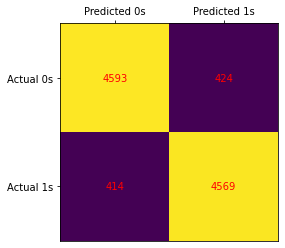

Fraction of correct predictions:  0.9162


In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 0; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0

#Regressors
np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)

#Error term
epsilon = np.random.logistic(0,1,n)

#Data Generating Process (True Model)
ystar = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon
y = 1*(ystar > 0)

#Correctly specified
x=np.column_stack((x1,x2,x3))
xcon = sm.add_constant(x)        
model = sm.OLS(y,xcon) 
results = model.fit()
print(results.summary2())

datalogit = pd.DataFrame(np.column_stack((y,x1,x2,x3)))
formula = ('y ~ x1 + x2 + x3')
model = logit(formula = formula, data = datalogit).fit()
print(model.summary())


AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

#cm = model.pred_table(0.8)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='newton-cg', C=9999999, fit_intercept=True)
model.fit(x, y)

prob = model.predict_proba(x)

pred = model.predict(x)

pred = 1*(prob[:,1] > 0.5)


cm = confusion_matrix(y, pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)



# Logit Classification

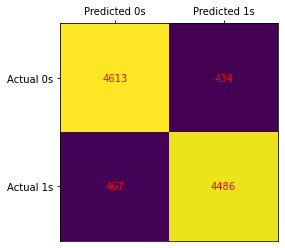

Fraction of correct predictions:  0.9099


In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 0; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0

#Regressors
np.random.seed(1000)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)

#Error term
epsilon = np.random.logistic(0,1,n)

#Data Generating Process (True Model)
ystar = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon
y = 1*(ystar > 0)
x=np.column_stack((x1,x2,x3))  

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='newton-cg', C=9999999, fit_intercept=True)
model.fit(x,y)

prob = model.predict_proba(x)
pred = model.predict(x)
pred = 1*(prob[:,1] > 0.5)
cm = confusion_matrix(y, pred)
frac_correct = (cm[0,0]+cm[1,1])/n

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.xaxis.tick_top()
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
print("Fraction of correct predictions: ", frac_correct)



# Cross Validation

In [35]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

#Input parameters
n = 10000; mu1 = 0; sigma1 = 1; mu2 = 0; sigma2 = 1; mu3 = 0
sigma3 = 1; c = 5; beta1 = 3; beta2 = 5; beta3 = 2
#Correlation between x2 and x3
rho = 0.8

#Regressors
np.random.seed(0)
x1 = np.random.normal(mu1,sigma1,n)
x2 = np.random.normal(mu2,sigma2,n)
x3 = rho*x2 + np.sqrt(1-rho**2)*np.random.normal(mu3,sigma3,n)

#Error term
epsilon = np.random.normal(0,1,n)

#Centering the regressors necessary for ridge regression 
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x3 = x3 - np.mean(x3)

#Data Generating Process (True Model)
y = c + beta1*x1 + beta2*x2 + beta3*x3 + epsilon

#Split the data 70/30 into training and test sample
#!!!!!! WE CAN ONLY USE THE FIRST 7000 and last 3000 BECAUSE WE ARE SIMULATING RANOM NUMBERS
#!!!!!! USING MONTE CARLO. IF WE HAD DATA WE MUST SELECT THE NUMBERS RANDOMLY AND NOT IN A ROW!!!!!
ntrain = int(0.7*n)
x1train = x1[0:ntrain]
x2train = x2[0:ntrain]
x3train = x3[0:ntrain]
ytrain = y[0:ntrain]

x1test = x1[ntrain:n]
x2test = x2[ntrain:n]
x3test = x3[ntrain:n]
ytest = y[ntrain:n]

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
xtrain = np.column_stack((x1train,x2train,x3train))
lambdas = np.arange(0.01, 1, 0.01)
rr = RidgeCV(alphas=lambdas, fit_intercept=True, store_cv_values=True)
rr.fit(xtrain, ytrain)

betaRidge = np.append(rr.intercept_,rr.coef_)
yhat = np.dot(sm.add_constant(np.column_stack((x1test,x2test,x3test))),betaRidge) 
yhat1 = rr.predict(np.column_stack((x1test,x2test,x3test)))
testMSE = np.mean((yhat-ytest)**2)

print("Optimal tuning parameter using cross validation: ", rr.alpha_)
print("Ridge Estimates using optimal tuning parameter : ", betaRidge)
print("Test MSE: ", testMSE)

#go with the smaler MSE
#rr.aplha_ how is this chosen?? should be mean squared error - for default to find the optinal alpha, should be inline with (logicCV doesnt use it!!!)


Optimal tuning parameter using cross validation:  0.17
Ridge Estimates using optimal tuning parameter :  [4.98897902 2.99354469 4.98299522 2.0254452 ]
Test MSE:  1.0075246108908533
